In [47]:
import sympy
import numpy as np
from sympy import latex, Matrix, plot, solve, linsolve, symbols, eye, zeros
from sympy import lambdify, S, Point, Line
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.vector import Vector, matrix_to_vector, AxisOrienter, express
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 11
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
**Линейный оператор** осуществляет **линейное отображение** линейного пространства на линейное пространство:
$$
A:\ Ax=y,\quad x\in X, y \in Y,
$$
при этом
$$
A(a_1x'+a_2x'')=a_1Ax'+a_2Ax''=a_1y'+a_2y'',
$$
где $a_1$ и $a_2$ - числа, $x'$ и $x''$ - элементы линейного пространства $X$, $y'$ и $y''$ - элементы линейного пространства $Y$.

$X$ и $Y$ могут быть разными или совпадать.

$x'$ и $x''$ - **прообразы** при линейном отображении $A$.

$y'$ и $y''$ - **образы** $x'$ и $x''$ при линейном отображении $A$.

Множество образов всех векторов пространства $X$ при линейном отображении $A$ называется **образом линейного оператора**.

Ввиду линейности оператора его ***образ полностью определяется образами базисных векторов*** $(e_1,e_2,...,e_n)$ пространства $X$, поскольку любой вектор $x$ пространства $X$ можно представить в виде $x=x_1e_1+x_2e_2+...+x_ne_n$,
откуда из линейности оператора следует  $Ax=A(x_1e_1+x_2e_2+...+x_ne_n)=x_1Ae_1+x_2Ae_2+...+x_nAe_n$.

Раскладывая векторы $Ae_k$, $k=1,2,..,n$ по базису $f_1,f_2,...,f_m$ пространства $Y$, получим
$Ae_k=a_{1k}f_1+a_{2k}f_2+...+a_{mk}f_m$, поэтому
$$
Ax=x_1Ae_1+...+x_nAe_n=x_1(a_{11}f_1+a_{21}f_2+...+a_{m1}f_m)+...+x_n(a_{1n}f_1+a_{2n}f_2+...+a_{mn}f_m).
$$
Сгруппируем слагаемые по базисным векторам $f_1,f_2,...,f_m$:
$$
Ax=(x_1a_{11}+...+x_na_{1n})f_1+(x_1a_{21}+...+x_na_{2n})f_2+...+(x_1a_{m1}+...+x_na_{mn})f_m
$$
Таким образом, координаты $y_1,y_2,...,y_m$ образа $Ax$ вектора $x$ выражаются через координаты $x_1$, $x_2$,...+$x_n$ вектора $x$ в базисе $(e_1,e_2,...,e_n)$ пространства $X$ и координаты $a_{ij}$ образов базисных векторов $f_1,f_2,...,f_m$ пространства $Y$ при линейном отображении $A$:
$$
y_j=x_1a_{j1}+x_2a_{j2}+...+x_na_{jn},\quad j=1,...m,
$$
в матричной форме это запишется как $y=Ax$, где $A$ - матрица с элементами $a_{ij}$ - $i$-я координата $j$-го базисного вектора $e_j$, т.е. матрица $A$ состоит из векторов - столбцов образов базисных векторов.

### Пример 1.
Построим матрицу оператора А, поворачивающего вектор на угол $\alpha$ против часовой стрелки. Такой оператор переводит вектор $(1,0)$ в вектор $(\cos\alpha,\sin\alpha)$, $(0,1)$ в $(-\sin\alpha,\cos\alpha)$, поэтому матрица $A$ имеет вид
$$
\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right)
$$

In [48]:
alpha = Pi / 3
A = Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
e1 = Matrix([1, 0])
e2 = Matrix([0, 1])
display(Latex(f'Ae_1 = {latex(A * e1)}, Ae_2 = {latex(A * e2)}'))

<IPython.core.display.Latex object>

Для удобства опишем в виде функции изображение вектора на плоскости, цвет по умолчанию красный.
Используем эту функцию для изображения нескольких векторов, аргументы - tuple из вектора и цвета, что позволит каждый вектор изобразить своим цветом.

Text(0.25, 0.1, '$\\pi / 3$')

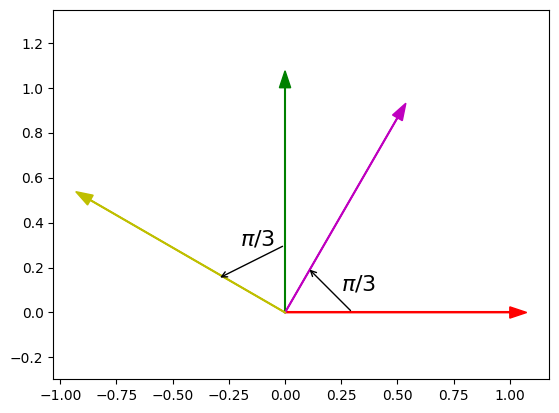

In [49]:
def plotvec(vect, **kwargs):
    x, y = [float(item) for item in vect]
    plt.plot([0, x], [0, y], **kwargs)
    plt.arrow(0, 0, x, y, head_width=0.05, **kwargs)
    return None

def plotvecs(*vecscolors):
    for item in vecscolors:
        plotvec(item[0], color=item[1])
    return None

plotvecs((e1, 'r'), (e2, 'g'), (A * e1, 'm'), (A * e2, 'y'))
plt.axis('equal')
plt.annotate('', xy=(-0.3, 0.15), xytext=(0.0, 0.3),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.annotate(latex(alpha, mode='inline'), xy=(-0.2, 0.3), fontsize=16)
plt.annotate('', xy=(0.1, 0.2), xytext=(0.3, 0.0),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.annotate(latex(alpha, mode='inline'), xy=(0.25, 0.1), fontsize=16)

Проверим, что при умножении матрицы А на произвольный вектор плоскости получается вектор, образующий угол с исходным вектором. Воспользуемся возможностями модуля Geometry:

In [50]:
from sympy.abc import x, y
O = Point(0, 0)
M = Point(x, y)
X = Matrix([x, y])
AX = A * X
B = Point(*AX)
OM = Line(O, M)
OB = Line(O, B)
display(Latex(f'Угол\ MOB\ {latex(OM.angle_between(OB).simplify())}'))

<IPython.core.display.Latex object>

### Пример 2.

Построить матрицу оператора, переводящего базисные векторы $i$, $j$ и $k$ трехмерного пространства в векторы
$(1,2,3)$, $(-2,1,4)$ и $(2,0,5)$.
Матрица такого оператора
$$
\left(\begin{matrix}
1&-2&2\\
2&1&0\\
3&4&5
\end{matrix}\right)
$$

In [51]:
A = Matrix([[1, -2, 2], [2, 1, 0], [3, 4, 5]])
display(Latex(f'A = {latex(A)}'))

<IPython.core.display.Latex object>

Проверим, что при умножении базисных векторов на эту матрицу действительно получаются заданные векторы:

In [52]:
i = Matrix([1, 0, 0])
j = Matrix([0, 1, 0])
k = Matrix([0, 0, 1])
vects_latex = [latex(A * vect) for vect in (i, j, k)]
display(Latex('A_i = {},\ A_j = {},\ A_k = {}'.format(*vects_latex)))

<IPython.core.display.Latex object>

Найдем вектор, в который оператор переводит вектор $$
\left(\begin{matrix}
3\\
-7\\
9
\end{matrix}\right)
$$

In [53]:
vec = Matrix([3, -7, 9])
display(Latex(f'z = {latex(vec)},\ A z = {latex(A * vec)}'))

<IPython.core.display.Latex object>

## Матрица линейного оператора в новом базисе
Пусть в новом базисе у оператора А матрица $A_{new}$, тогда получить образ вектора $x$ можно так: зная координаты  $x$ в новом базисе, находим его координаты в старом базисе с помощью преобразования, определяемого матрицей $P$, потом к полученному вектору в старом базисе применяем оператор А, умножая вектор в старом базисе на матрицу А в старом же базисе, после чего переводим полученный образ из старого базиса в новый умножением на матрицу  $P^{-1}$.
В итоге получается цепочка умножений $P^{-1}AP$, это произведение и есть матрица оператора А в новом базисе, где $P$ - матрица перехода от нового базиса к старому.

Тонкость такая: базисные векторы нового базиса в новом базисе будут иметь координаты $(1,0,0)$, $(0,1,0)$ и $(0,0,1)$, точно как базисные векторы старого базиса в старом базисе, поэтому умножая вектор $v$ с координатами в новом базисе на матрицу  $P$ мы получим координаты вектора $v$ в старом базисе. Если требуется по координатам в старом базисе найти координаты в новом, нужно умножать на обратную матрицу, т.е. $P^{-1}$.
$$
A_{new}=P^{-1}AP\qquad(1)
$$

### Пример 3.

Найти матрицу оператора А примера 2 в базисе из векторов $(1,2,0)$, $(1,0,3)$ и $(0,1,5)$.

Вначале составим матрицу перехода, она будет такой же, как матрица некоторого оператора, переводящего текущий базис $(1,0,0)$, $(0,1,0)$ и $(0,0,1)$ в новый:
$$
P=\left(\begin{matrix}
1&1&0\\
2&0&1\\
0&3&5
\end{matrix}\right)
$$
Затем найдем матрицу оператора в новом базисе по формуле (1)

In [54]:
P = Matrix([[1, 1, 0], [2, 0, 1], [0, 3, 5]])
A_new = P ** (-1) * A * P
display(Latex(f'P = {latex(P)}, A_{{new}} = {latex(A_new)}'))

<IPython.core.display.Latex object>

Проследим за трансформацией новых базисных векторов $f_1$, $f_2$, $f_3$. Вначале найдем их образы при операторе А, умножая их на матрицу А в старом базисе, поскольку мы знаем координаты новых базисных векторов в старом базисе:

In [55]:
f1 = Matrix((1, 2, 0))
f2 = Matrix((1, 0, 3))
f3 = Matrix((0, 1, 5))
vects_latex = [latex(A * vect) for vect in (f1, f2, f3)]
display(Latex('Af_1 = {}, Af_2 = {}, Af_3 = {}'.format(*vects_latex)))

<IPython.core.display.Latex object>

Мы получили координаты образов векторов нового базиса в старом базисе, теперь нужно найти координаты полученных векторов в новом базисе. Для этого нужно умножить векторы на матрицу, обратную к матрице $P$:

In [56]:
Pinv = 'P^{-1}'
vects_latex = [latex(P ** (-1) *A * vect) for vect in (f1, f2, f3)]
display(Latex("""{Pinv}Af_1 = {},
{Pinv}Af_2 = {}, {Pinv}Af_3 = {}""".format(Pinv=Pinv, *vects_latex)))

<IPython.core.display.Latex object>

## Собственные числа и собственные векторы линейного оператора.

Пусть для некоторого ненулевого вектора $x$ и числа $\lambda$ выполняется **$$Ax=\lambda x, \quad x\neq0,$$**
тогда $\lambda$ - **собственное число** линейного оператора $A$, а $x$ - **собственный вектор**, соответствующий собственному числу $\lambda$.

Собственные числа не зависят от выбора базиса!

Находить собственные числа можно, решая **характеристическое уравнение** $|A-\lambda E|=0$, где $E$ - единичная матрица подходящей размерности.

Собственные векторы получаются как решения СЛАУ $(A-\lambda E)x=0$, где $\lambda$ - соответствующее собственное число.

В sympy есть средства вычисления собственных чисел и векторов

**eigenvals** (словарь, ключи - собственные числа, значения - их кратности)

**eigenvects** (список кортежей, первый элемент кортежа - собственное число, второй - его кратность, третий - список собственных векторов, соответствующих этому собственному числу)

Если у оператора в трехмерном пространстве есть три собственных вектора, то в базисе из этих векторов матрица оператора диагональная, на диагонали - собственные числа оператора.

### Пример 3.
Дана матрица оператора В:
$$
\left(\begin{matrix}
51&-8&-12\\
9&33&-18\\
-18&-6&66
\end{matrix}\right)
$$

Найти матрицу оператора B в базисе из собственных векторов.

Вначале найдем собственные векторы:

In [57]:
B = Matrix([[51, -8, -12], [9, 33, -18], [-18, -6, 66]])
res = B.eigenvects()
display(Latex(latex(res)))

<IPython.core.display.Latex object>

Составим матрицу перехода, она состоит из столбцов с координатами собственных векторов в старом базисе:

In [58]:
P = res[0][2][0].row_join(res[1][2][0]).row_join(res[2][2][0])
display(Latex(f'P = {latex(P)},\ |P| = {P.det()}'))

<IPython.core.display.Latex object>

Найдем матрицу в базисе из собственных векторов по формуле (1) перед примером 3:

In [59]:
B_new = P ** (-1) * B * P
display(Latex(f'B_{{new}} = {latex(B_new)}'))

<IPython.core.display.Latex object>

Поменяем в матрице P последовательность векторов, поменяем местами второй и третий векторы:

In [60]:
P_new = P[:, 0].row_join(P[:, 2]).row_join(P[:, 1])
B_new_1 = P_new ** (-1) * B * P_new
display(Latex(f'P_{{new}} = {latex(P_new)},\
\ B_{{new}}^1 = {latex(B_new_1)}'))

<IPython.core.display.Latex object>

Заметим, что изменилась последовательность собственных чисел на главной диагонали, причем в соответствии с изменением порядка следования собственных векторов в матрице перехода.

### Пример 4

Найдем собственные числа по определению, т.е. как корни характеристического многочлена $|B-\lambda E|=0$

In [61]:
lam = symbols('lamda')
lambdas = solve((B - lam * eye(3)).det())
display(Latex('\lambda = ' + \
              ',\ '.join(['{}'] * len(lambdas)).format(*lambdas)))

<IPython.core.display.Latex object>

Для каждого собственного числа найдем собственный вектор, решив СЛАУ $(B-\lambda E)x=0$:

In [62]:
evects = set()
zero_vect = zeros(3, 1)
k1, k2, k3 = symbols('k1:4')
for lam in lambdas:
    sol = linsolve(((B - lam * eye(3)), zero_vect), k1, k2, k3)
    evects = sympy.Union(evects, sol)
P = Matrix([p.subs(symb, 1) for p in evects for symb in p.free_symbols]).T
display(Latex('e_1 = {}, e_2 = {},\
 e_3 = {}, P = {}'.format(*[latex(item) for item in evects], latex(P))))

<IPython.core.display.Latex object>

# Sympy-Numpy взаимодействие
### Пример 5
Опишем функцию, использующую Sympy, возвращающую длину вектора с координатами $(\sin(\phi), \sin(2\phi), \sin(3\phi))$. Этой функции в качестве аргумента можно передавать числовые объекты Sympy, например число $\pi$.

В теле функции введем безымянную систему координат, составим вектор и применим к нему метод magnitude для вычисления длины.

In [68]:
def vect_angle(phi):
    Sys = CoordSys3D('')
    vect = Cos(phi) * Sys.i + Cos(2 * phi) * Sys.j + Cos(3 * phi) * Sys.k
    return vect.magnitude()

Выведем на экран несколько значений этой функции с аргументом, равным $\pi/3$, $-\pi/4$ и $\pi/6$.

In [76]:
phi = S('phi')
phi_arr = (sympy.pi / 3,  -sympy.pi / 4, sympy.pi / 6)
n = len(phi_arr)
display(Latex(',\ '.join(['{}:\ длина\ {}\ '.format(*map(latex,\
(phi_val, vect_angle(phi_val)))) for phi_val in phi_arr])))

<IPython.core.display.Latex object>

Создадим на основе этой функции ее двойник для numpy, назовем vect_angle_np. При вызове этой функции передадим в качестве аргумента последовательность значений np.linspace(0, 2, 5), это 5 чисел, равномерно расположенных на отрезке от 0 до 2.

In [77]:
vect_angle_np = lambdify(phi, vect_angle(phi), 'numpy')
print(vect_angle_np(np.linspace(0, 2, 5)), sep='\n')

[1.73205081 1.03299636 1.20216052 1.0146545  1.23383757]


Функцию vect_angle_np можно использовать для построения графика зависимости длины вектора $(\sin(\phi), \sin(2\phi), \sin(3\phi))$ от угла $\phi$.

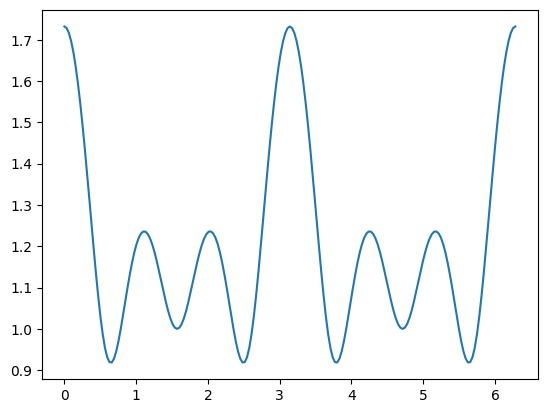

In [79]:
x_ls = np.linspace(0, 2 * np.pi, 201)
plt.plot(x_ls, vect_angle_np(x_ls))

### Пример 6
Опишем функцию slope_func, возвращающую угол между прямой, проходящей через точки $(x1, y1)$ и $(x2, y2)$ и осью $OX$.

In [101]:
def slope_func(x1, y1, x2, y2):
    a_line = Line(Point(x1, y1), Point(x2, y2))
    return a_line.smallest_angle_between(Line(Point(0, 0), Point(1, 0)))

Будем подставлять в функцию координаты точек

In [103]:
for x1, y1, x2, y2 in zip((1, 2, 0), (1, 1, 0), (2, 2, 1), (2, 3, sympy.sqrt(3))):
    display(Latex(f'Точки\ A({x1}, {y1}),\ B({x2}, {latex(y2)}):\ {latex(slope_func(x1, y1, x2, y2))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Создадим на основе этой функции ее двойник для numpy, назовем slope_func_np. Обратим внимание, что аргументы сгруппированы в список при вызове lambdify.

In [96]:
x1, y1, x2, y2 = symbols('x1 y1 x2 y2')
slope_func_np = lambdify([x1, y1, x2, y2], slope_func(x1, y1, x2, y2))

При вызове этой функции передадим в качестве аргументов np.linspace.

In [100]:
x1_arr = np.linspace(0, 2, 4)
y1_arr = np.linspace(1, 2, 4)
x2_arr = np.linspace(-1, 2, 4)
y2_arr = np.linspace(4, 8, 4)
print(*slope_func_np(x1_arr, y1_arr, x2_arr, y2_arr), sep=', ')

1.2490457723982544, 1.4056476493802699, 1.5042281630190728, 1.5707963267948966
